# Homework w03d05 -  Bias-Variance Tradeoff

Use the function and x_data values together with some random noise below to generate y_data.
Perform an ordinary least squares fit of y_data versus x_data of the following form
    
1. With a monomial of the form $a + b  x^n$ for varying integer values n
1. With a polynomial of degree $n$ of the form $a_0+a_1 x+ a_2 x^2 + \ldots + x^n$ for varying integer values $n$.

For all cases, calculate the variance and the bias. What do you observe?

Hint: For the predicted values $\hat{y}$, the bias can be calculated as ${\rm Bias} = {\rm SSE} - {\rm Var}(\hat{y}) - \sigma^2$ where $\sigma$ is the standard deviation of the random noise and ${\rm SSE} = {\rm Mean}({\rm Mean}(\hat{y}) - y)^2)$.

In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

(-2, 2)

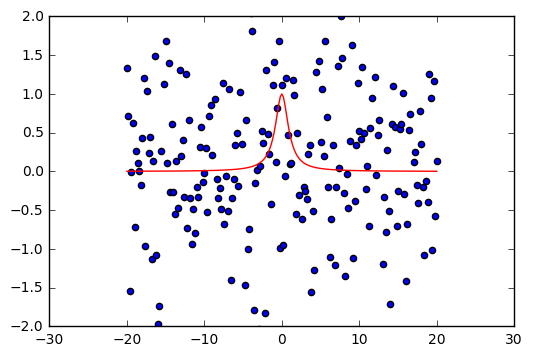

In [2]:
def func(x_,sigma_):
    noise = sigma_*np.random.normal(size=len(x_data))
    return 1./(1+x_**2) + noise

np.random.seed(10)

sigma = 1

x_data = np.linspace(-20,20,201)
y_data = func(x_data,sigma)

plt.scatter(x_data,y_data)
plt.plot(x_data,func(x_data,0),c='r')
plt.ylim(-2,2)

In [3]:
max_power = 200
columns = ['x_'+str(max_power-1-i) for i in range(max_power)]

In [4]:
X = pd.DataFrame(np.vander(x_data,max_power),columns=columns)
y = pd.Series(y_data)
print X.shape, y.shape
X.head()

(201, 200) (201,)


,x_199,x_198,x_197,x_196,x_195,x_194,x_193,x_192,x_191,x_190,...,x_9,x_8,x_7,x_6,x_5,x_4,x_3,x_2,x_1,x_0
0,-8.034690e+258,4.017345e+257,-2.008673e+256,1.004336e+255,-5.021681e+253,2.510841e+252,-1.255420e+251,6.277102e+249,-3.138551e+248,1.569275e+247,...,-5.120000e+11,2.560000e+10,-1.280000e+09,6.400000e+07,-3.200000e+06,160000.0000,-8000.000,400.00,-20.0,1.0
1,-1.087359e+258,5.491711e+256,-2.773591e+255,1.400804e+254,-7.074766e+252,3.573114e+251,-1.804603e+250,9.114158e+248,-4.603110e+247,2.324803e+246,...,-4.677208e+11,2.362226e+10,-1.193044e+09,6.025473e+07,-3.043168e+06,153695.3616,-7762.392,392.04,-19.8,1.0
2,-1.441977e+257,7.357023e+255,-3.753583e+254,1.915094e+253,-9.770885e+251,4.985146e+250,-2.543442e+249,1.297674e+248,-6.620787e+246,3.377953e+245,...,-4.268789e+11,2.177953e+10,-1.111201e+09,5.669391e+07,-2.892547e+06,147578.9056,-7529.536,384.16,-19.6,1.0
3,-1.873028e+256,9.654783e+254,-4.976692e+253,2.565305e+252,-1.322322e+251,6.816095e+249,-3.513451e+248,1.811057e+247,-9.335346e+245,4.812034e+244,...,-3.892383e+11,2.006383e+10,-1.034218e+09,5.331021e+07,-2.747949e+06,141646.8496,-7301.384,376.36,-19.4,1.0
4,-2.382015e+255,1.240633e+254,-6.461630e+252,3.365432e+251,-1.752829e+250,9.129319e+248,-4.754853e+247,2.476486e+246,-1.289837e+245,6.717899e+243,...,-3.545774e+11,1.846757e+10,-9.618528e+08,5.009650e+07,-2.609193e+06,135895.4496,-7077.888,368.64,-19.2,1.0


In [5]:
list_bias = []
list_var = []

for i in range(1,max_power):
    Z = pd.DataFrame(X.iloc[:,-i])
    model = LinearRegression(fit_intercept=True)
    model.fit(Z, y)
    yhat = model.predict(Z)

    sse = np.mean((np.mean(yhat) - y_data) ** 2)
    var = np.var(yhat)
    bias = sse - var - sigma**2
    list_var.append([i,var])
    list_bias.append([i,bias])

list_var = np.array(list_var)
list_bias = np.array(list_bias)
my_dict = {'Variance': list_var[:,1], 'Bias': list_bias[:,1]}
df_monom = pd.DataFrame.from_dict(my_dict)

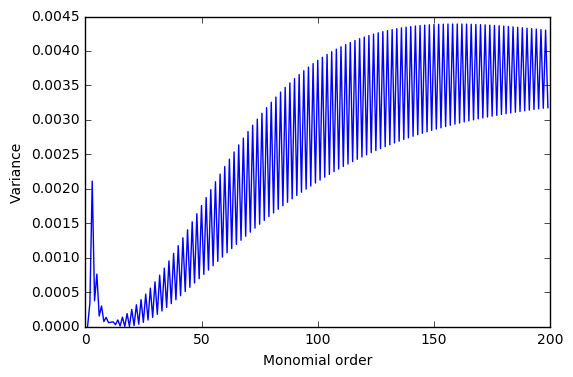

In [6]:
plt.plot(list_var[:,0],list_var[:,1])
plt.xlabel('Monomial order')
plt.ylabel('Variance')

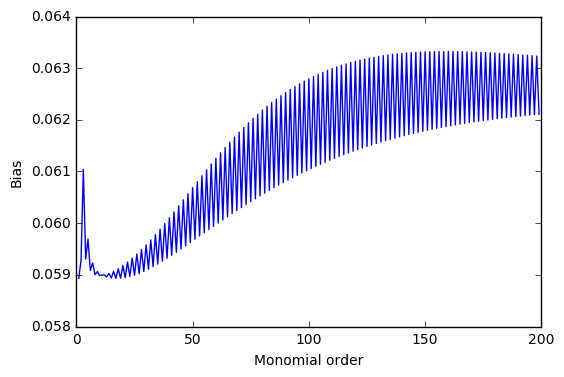

In [7]:
plt.plot(list_bias[:,0],-list_bias[:,1])
plt.xlabel('Monomial order')
plt.ylabel('Bias')

In [8]:
df_monom.index[df_monom.Bias==df_monom.Bias.min()]

Int64Index([157], dtype='int64')

In [9]:
list_bias = []
list_var = []
list_XX = []
for i in range(1,max_power):
    Z = X.iloc[:,(X.shape[1]-i):]
    model = LinearRegression(fit_intercept=True)
    model.fit(Z, y)
    yhat = model.predict(Z)

    sse = np.mean((np.mean(yhat) - y_data) ** 2)
    var = np.var(yhat)
    bias = sse - var - sigma**2

    list_var.append([i,var])
    list_bias.append([i,bias])

list_var = np.array(list_var)
list_bias = np.array(list_bias)
my_dict = {'Variance': list_var[:,1], 'Bias': list_bias[:,1]}
df_polynom = pd.DataFrame.from_dict(my_dict)

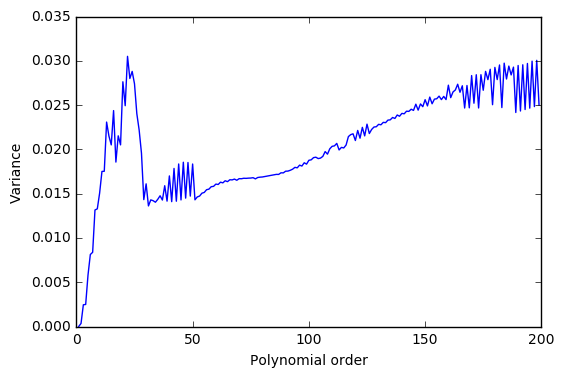

In [10]:
plt.plot(list_var[:,0],list_var[:,1])
plt.xlabel('Polynomial order')
plt.ylabel('Variance')
plt.show()

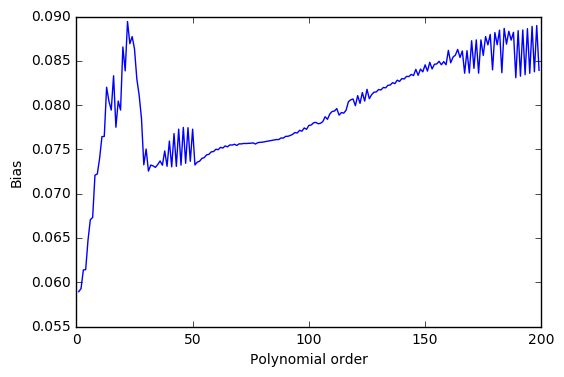

In [11]:
plt.plot(list_bias[:,0],np.abs(list_bias[:,1]))
plt.xlabel('Polynomial order')
plt.ylabel('Bias')
plt.show()